# Red and White Wine Quality Analysis 

**Data Bootcamp - Fall 2018 MBA**

**Caroline Packowski, Gabrielle Sart and Kaitlin Slattery**


## Introduction 

For our course project, we set out to study how a wine's chemical composition (pH, alcohol, residual sugar, etc.) affects quality. 

By examining each of these chemical attributes, then taking those we suspect to have the greatest impact on quality and running correlation, regression and cluster tests, our goal is to confirm which attribute has the greatest impact on quality. 

We have broken our project into four sections. 
1. Dataset Background: basic analysis of our two data sets, White Wine and Red Wine, both separately and merged
2. White Wine Findings: distribution, scatterplots & regression, correlation and clusters.
3. Red Wine Findings: distribution, scatterplots & regression, correlation and clusters.
4. Key Takeaways

Finally, we will conclude with the implications of most important variables on wine buying and wine collecting.

## Packages

- We will use pandas to import, manage and analyze our data
- We will use matplotlib to plot and visualize results
- We will use datetime to check today's date
- We will use sys to convert to Python
- We will use numpy for specific functionality and computing
- We will use seaborn for more advanced visualization
- We will use statsmodels.api for statistical modeling and regressions
- We will use statsmodels.formula.api for statistical modeling and regressions

In [1]:
# import packages 
import pandas as pd                   # data management
import matplotlib.pyplot as plt       # graphics 
import datetime as dt                 # check today's date 
import sys                            # check Python version 
import numpy as np                    # scientific computing   
import seaborn as sns                 # data visualization 
import statsmodels.api as sm          # statistical modeling
import statsmodels.formula.api as smf # regression analysis 


from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


## 1. Data Set Information 

The data sets we have pulled come essentially from Kaggle. We pulled one data set for White Wine and another for Red Wine.

Our dependent variable is **Quality**.

Our independent variables are as follows: 
- **Fixed Acidity**: acidity produced in the body from sources other than carbon dioxide
- **Volatile Acidity**: acidity that is typically a by-product of fermentation, but can also indicate spoilage
- **Citric Acid**: a weak organic acid often used as a natural preservative or additive to add a sour taste
- **Residual Sugar**: refers to any natural grape sugars that are leftover after fermentation ceases; fermentation uses up sugars as the yeasts consume it
- **Chlorides**: compounds responsible for salty taste
- **Free Sulfur Dioxide**: sulphur dioxide not associated with wine molecules
- **Total Sulfur Dioxide**: composed of free and bound sulphur dioxide, use as a preservative because of its anti-oxidative and anti-microbial properties
- **Density**: in the case of wine, it is primarily determined by the concentration of alcohol, sugar, glycerol, and other dissolved solids
- **pH**: used as a measure of ripeness in relation to acidity
- **Sulphates**: a salt or ester of sulfuric acid, often used for industrial cleansing purposes
- **Alcohol**: also known by its chemical name ethanol, is a psychoactive substance that is the active ingredient in drinks such as beer, wine, and distilled spirits

While we will study each independent variable's particular effect on the depend variable, we understand that some effects may be interrelated by chemical processes.

In [2]:
url_white = "https://raw.githubusercontent.com/krs520/Data-Bootcamp-Project/master/wineQualityWhites.csv" 
url_red = "https://raw.githubusercontent.com/krs520/Data-Bootcamp-Project/master/wineQualityReds.csv"

dfwhite = pd.read_csv(url_white) # Read in dataset on white wine quality 
dfred = pd.read_csv(url_red) # Read in dataset on red wine quality 

dfwhite = dfwhite.rename(columns={'Unnamed: 0':'wine number', 'fixed.acidity':'fixed_acidity', 'volatile.acidity':'volatile_acidity',
                                 'citric.acid':'citric_acid','residual.sugar':'residual_sugar','total.sulfur.dioxide':'total_sulfur_dioxide',
                                 'free.sulfur.dioxide':'free_sulfur_dioxide'}) # Rename the columns 
dfred = dfred.rename(columns={'Unnamed: 0':'wine number','fixed.acidity':'fixed_acidity', 'volatile.acidity':'volatile_acidity',
                                 'citric.acid':'citric_acid', 'residual.sugar':'residual_sugar', 'total.sulfur.dioxide':'total_sulfur_dioxide',
                                 'free.sulfur.dioxide':'free_sulfur_dioxide'}) # Rename the columns 

dfwhite['type']='White' # Added a column to dfwhite for 'type' = 'White'
dfred['type']='Red' # Added a column to dfred for 'type' = 'Red'

dfwhite = dfwhite.set_index(['wine number', 'type']) # Set two indexes 
dfred = dfred.set_index(['wine number', 'type']) # Set two indexes 

Let's look at characteristics of each data frame:

In [3]:
for df in [dfwhite, dfred]:
    print('Type:', type(df), '\n')
    print('Dimensions:', df.shape, '\n')
    print('Variables:', df.columns.tolist(), '\n \n')

Type: <class 'pandas.core.frame.DataFrame'> 

Dimensions: (4898, 12) 

Variables: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'] 
 

Type: <class 'pandas.core.frame.DataFrame'> 

Dimensions: (1599, 12) 

Variables: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'] 
 



The White Wine data frame has 4898 observations against 12 variables, which are Fixed Acidity, Volatile Acidity, Citric Acid, Residual Sugar, Chlorides, Free Sulfur Dioxide, Total Sulfur Dioxide, Density, pH, Sulphates, Alcohol, and Quality.

The Red Wine data frame has 1599 observations against 12 variables, which are Fixed Acidity, Volatile Acidity, Citric Acid, Residual Sugar, Chlorides, Free Sulfur Dioxide, Total Sulfur Dioxide, Density, pH, Sulphates, Alcohol, and Quality.

Next let's merge the two data frames, each with another column for Type - Red or White.

In [4]:
frames = [dfwhite, dfred]
df = pd.concat(frames) # Create a new dataframe merging dfwhite and dfred 

df

,,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
wine number,type,,,,,,,,,,,,
1,White,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
2,White,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
3,White,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
4,White,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,White,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,White,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
7,White,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
8,White,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
9,White,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6


The new merge data frame has 6497 rows, or observations, against 12 columns, or variables.

df.describe provides us with high-level, descriptive statistics on the merged data frame, including mean, standard deviation, minimum and maximum values.

In [5]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


df.info tells us what type of object each variable is: all independent variables are floats, and the dependent variable Quality is an integer.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6497 entries, (1, White) to (1599, Red)
Data columns (total 12 columns):
fixed_acidity           6497 non-null float64
volatile_acidity        6497 non-null float64
citric_acid             6497 non-null float64
residual_sugar          6497 non-null float64
chlorides               6497 non-null float64
free_sulfur_dioxide     6497 non-null float64
total_sulfur_dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 666.5+ KB


Next, we wanted to look at the distribution of quality in the merged data set. Most wines were given a 6, followed relatively closely by 5. The score of 7 was less frequent, and the most extreme scores on either end (3, 4, 8, 9) were rare.

In [7]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [8]:
df_plot = df.groupby(['type', 'quality']).size().reset_index().pivot(columns='type', index='quality', values=0)
df_plot

type,Red,White
quality,,
3,10.0,20.0
4,53.0,163.0
5,681.0,1457.0
6,638.0,2198.0
7,199.0,880.0
8,18.0,175.0
9,NaN,5.0


The below bar chart shows the breakdown of quality scores visually, with the full bar representing total counts. The red and white portion of the bars help us differentiate which counts came from the Red Wine vs. the White Wine data sets.

Text(0.5,1,'Wine Quality Count')

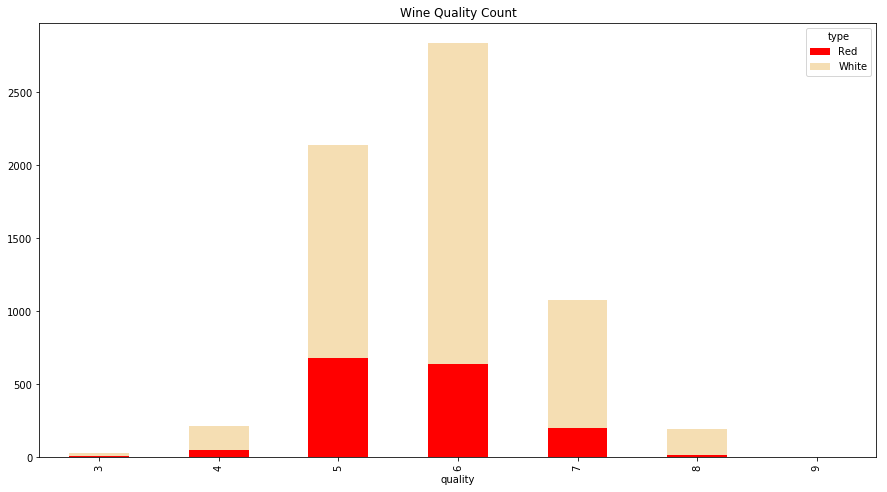

In [9]:
df_plot.plot(kind='bar', stacked=True, figsize=(15,8), color =['red','wheat']).set_title('Wine Quality Count')

# 2. White Wine Findings

Let's look at the White Wine data set.

In [10]:
dfwhite

,,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
wine number,type,,,,,,,,,,,,
1,White,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
2,White,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
3,White,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
4,White,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,White,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
6,White,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
7,White,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6
8,White,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
9,White,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6


In [11]:
dfwhite.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### *Data Cleanup*

In this section, we removed outliers. Later in this section we will be graphic select variables from this data frame. To better show the relationships between varaibles, we have removed all outliers that are outside of -+ 3 standard deviations from the mean.

We will be removing outliers for Alcohol, Density and Residual Sugar for the purpose of our graphs.

In [12]:
dfwhite_2 = dfwhite[np.abs(dfwhite.alcohol-dfwhite.alcohol.mean()) <= (3*dfwhite.alcohol.std())]
# keep only the ones that are within +3 to -3 standard deviations in the column 'Alcohol'.

dfwhite_2 = dfwhite_2[np.abs(dfwhite.density-dfwhite.density.mean()) <= (3*dfwhite.density.std())]
# keep only the ones that are within +3 to -3 standard deviations in the column 'Density'.

dfwhite_2 = dfwhite_2[np.abs(dfwhite.residual_sugar-dfwhite.residual_sugar.mean()) <= (3*dfwhite.residual_sugar.std())]
# keep only the ones that are within +3 to -3 standard deviations in the column 'Residual Sugar'.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


### *Groupby*

We grouped observations by quality score and by independent variable, and then found the average for each variable.

In [13]:
dfwhite.groupby('quality')['fixed_acidity','volatile_acidity', 'citric_acid', 
            'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 
            'density', 'pH', 'sulphates', 'alcohol'].mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
4,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
5,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
7,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936
8,6.657143,0.277400,0.326514,5.671429,0.038314,36.720000,126.165714,0.992236,3.218686,0.486229,11.636000
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


Quality scores range from 3 to 9.

While the above does not yet show very clear patterns in terms of what variable has the strongest impact on quality, it does appear that lower volatile acidity is associated with higher quality wines, as are low levels of chlorides and total sulfure dioxide, lower density and higher pH. We will run more test to confirm this initial read.

### *Distribution of Quality in White Wines*

In [14]:
dfwhite['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

The below bar chart shows the quality score breakdown in White Wines. Most wines were awarded a score of 6, followed by the score of 5 and 7. There were only a few 4 and 8 scores given, and virtually no 3 or 9 scores.

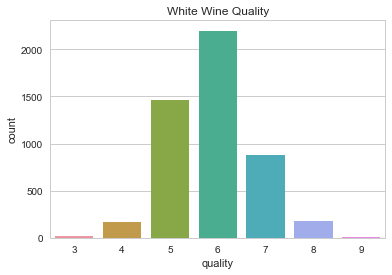

In [15]:
sns.set(style='whitegrid')

sns.countplot(x = 'quality',
              data = dfwhite).set_title('White Wine Quality')
plt.show()

### *Scatterplots & Regression*

Scatterplots display values for chosen data points, showing how much one variable is affected by another.

Regression analysis estimates the relationship between variables. Regression coefficients represent the mean change in the Dependent Variable for one unit of change in the Independent Variable, holding other variables in the model constant.

#### Quality vs Fixed Acidity 

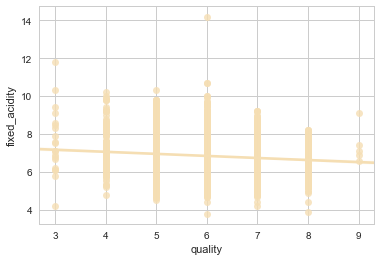

In [16]:
sns.regplot(x=dfwhite["quality"], y=dfwhite["fixed_acidity"], color = 'wheat')

In [17]:
smf.ols('quality ~ fixed_acidity ', data=dfwhite).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     64.08
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           1.48e-15
Time:                        20:40:33   Log-Likelihood:                -6322.8
No. Observations:                4898   AIC:                         1.265e+04
Df Residuals:                    4896   BIC:                         1.266e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.6956      0.103     65.057      0.000       6.494       6.897
fixed_acidity    -0.1193      0.015     -8.005      0.000      -0.149      -0.090
==============================================================================
Omnibus:                       29.986   Durbin-Watson:                   1.657
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.513
Skew:                           0.166   Prob(JB):                     1.44e-07
Kurtosis:                       3.211   Cond. No.                         57.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Quality vs Volatile Acidity 

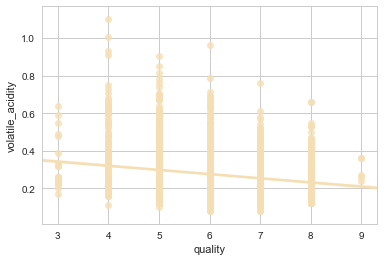

In [18]:
sns.regplot(x=dfwhite["quality"], y=dfwhite["volatile_acidity"], color = 'wheat')

In [19]:
smf.ols('quality ~ volatile_acidity', data=dfwhite).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     193.0
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           4.67e-43
Time:                        20:40:34   Log-Likelihood:                -6260.0
No. Observations:                4898   AIC:                         1.252e+04
Df Residuals:                    4896   BIC:                         1.254e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.3540      0.036    174.320      0.000       6.283       6.425
volatile_acidity    -1.7109      0.123    -13.891      0.000      -1.952      -1.469
==============================================================================
Omnibus:                       76.271   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.657
Skew:                           0.268   Prob(JB):                     4.14e-19
Kurtosis:                       3.357   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Quality vs Citric Acid

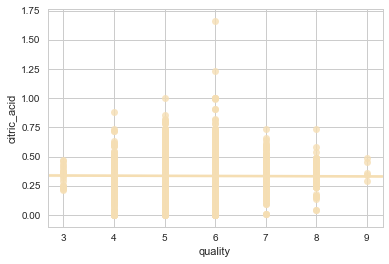

In [20]:
sns.regplot(x=dfwhite["quality"], y=dfwhite["citric_acid"], color = 'wheat')

In [21]:
smf.ols('quality ~ citric_acid', data=dfwhite).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4153
Date:                Thu, 20 Dec 2018   Prob (F-statistic):              0.519
Time:                        20:40:36   Log-Likelihood:                -6354.4
No. Observations:                4898   AIC:                         1.271e+04
Df Residuals:                    4896   BIC:                         1.273e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.9004      0.037    158.736      0.000       5.828       5.973
citric_acid    -0.0674      0.105     -0.644      0.519      -0.272       0.138
==============================================================================
Omnibus:                       27.428   Durbin-Watson:                   1.657
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.026
Skew:                           0.154   Prob(JB):                     4.98e-07
Kurtosis:                       3.217   Cond. No.                         9.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Quality vs Residual Sugar

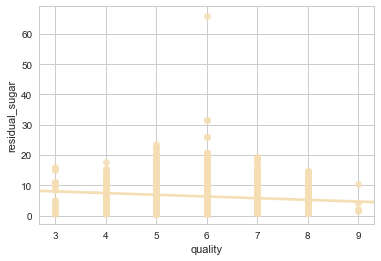

In [22]:
sns.regplot(x=dfwhite["quality"], y=dfwhite["residual_sugar"], color='wheat')

In [23]:
smf.ols('quality ~ residual_sugar', data=dfwhite).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     47.06
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           7.72e-12
Time:                        20:40:37   Log-Likelihood:                -6331.2
No. Observations:                4898   AIC:                         1.267e+04
Df Residuals:                    4896   BIC:                         1.268e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.9868      0.020    295.447      0.000       5.947       6.027
residual_sugar    -0.0170      0.002     -6.860      0.000      -0.022      -0.012
==============================================================================
Omnibus:                       25.795   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.066
Skew:                           0.126   Prob(JB):                     4.88e-07
Kurtosis:                       3.281   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Quality vs Chlorides

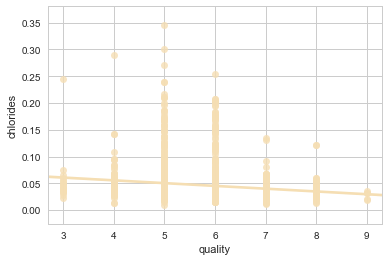

In [24]:
sns.regplot(x=dfwhite["quality"], y=dfwhite["chlorides"], color='wheat')

In [25]:
smf.ols('quality ~ chlorides', data=dfwhite).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     225.7
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           6.51e-50
Time:                        20:40:38   Log-Likelihood:                -6244.2
No. Observations:                4898   AIC:                         1.249e+04
Df Residuals:                    4896   BIC:                         1.251e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2674      0.029    218.166      0.000       6.211       6.324
chlorides     -8.5100      0.566    -15.024      0.000      -9.620      -7.400
==============================================================================
Omnibus:                       23.609   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.746
Skew:                           0.116   Prob(JB):                     1.56e-06
Kurtosis:                       3.277   Cond. No.                         45.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Quality vs Free Sulfur Dioxide

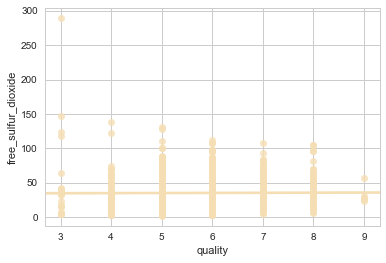

In [26]:
sns.regplot(x=dfwhite["quality"], y=dfwhite["free_sulfur_dioxide"], color='wheat')

In [27]:
smf.ols('quality ~ free_sulfur_dioxide ', data=dfwhite).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3259
Date:                Thu, 20 Dec 2018   Prob (F-statistic):              0.568
Time:                        20:40:39   Log-Likelihood:                -6354.5
No. Observations:                4898   AIC:                         1.271e+04
Df Residuals:                    4896   BIC:                         1.273e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.8629      0.029    201.025      0.000       5.806       5.920
free_sulfur_dioxide     0.0004      0.001      0.571      0.568      -0.001       0.002
==============================================================================
Omnibus:                       27.869   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.413
Skew:                           0.157   Prob(JB):                     4.10e-07
Kurtosis:                       3.214   Cond. No.                         90.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Quality vs Total Sulfur Dioxide

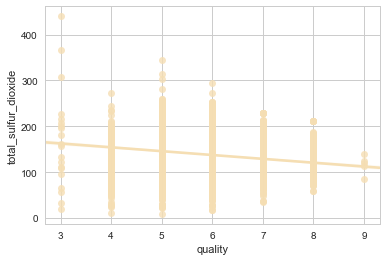

In [28]:
sns.regplot(x=dfwhite["quality"], y=dfwhite["total_sulfur_dioxide"], color='wheat')

In [29]:
smf.ols('quality ~ total_sulfur_dioxide ', data=dfwhite).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     154.2
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           6.99e-35
Time:                        20:40:39   Log-Likelihood:                -6278.7
No. Observations:                4898   AIC:                         1.256e+04
Df Residuals:                    4896   BIC:                         1.257e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.3817      0.042    150.356      0.000       6.299       6.465
total_sulfur_dioxide    -0.0036      0.000    -12.418      0.000      -0.004      -0.003
==============================================================================
Omnibus:                       27.910   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.245
Skew:                           0.094   Prob(JB):                     2.22e-08
Kurtosis:                       3.371   Cond. No.                         493.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Quality vs Density

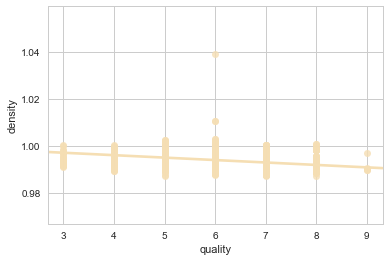

In [30]:
sns.regplot(x=dfwhite["quality"], y=dfwhite["density"], color = 'wheat')

In [31]:
smf.ols('quality ~ density ', data=dfwhite).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     509.9
Date:                Thu, 20 Dec 2018   Prob (F-statistic):          1.73e-107
Time:                        20:40:40   Log-Likelihood:                -6112.0
No. Observations:                4898   AIC:                         1.223e+04
Df Residuals:                    4896   BIC:                         1.224e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     96.2771      4.003     24.049      0.000      88.429     104.125
density      -90.9424      4.027    -22.581      0.000     -98.838     -83.047
==============================================================================
Omnibus:                       56.162   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.563
Skew:                           0.099   Prob(JB):                     9.68e-20
Kurtosis:                       3.624   Cond. No.                         665.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Quality vs pH

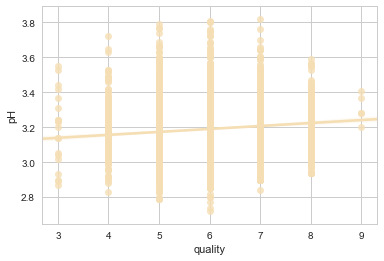

In [32]:
sns.regplot(x=dfwhite["quality"], y=dfwhite["pH"], color = 'wheat')

In [33]:
smf.ols('quality ~ pH ', data=dfwhite).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     48.88
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           3.08e-12
Time:                        20:40:41   Log-Likelihood:                -6330.3
No. Observations:                4898   AIC:                         1.266e+04
Df Residuals:                    4896   BIC:                         1.268e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0187      0.266     15.095      0.000       3.497       4.541
pH             0.5832      0.083      6.992      0.000       0.420       0.747
==============================================================================
Omnibus:                       26.367   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.569
Skew:                           0.142   Prob(JB):                     6.26e-07
Kurtosis:                       3.244   Cond. No.                         74.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Quality vs Sulphates


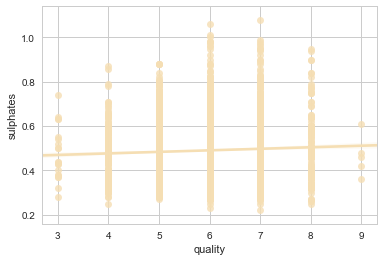

In [34]:
sns.regplot(x=dfwhite["quality"], y=dfwhite["sulphates"], color = 'wheat')

In [35]:
smf.ols('quality ~ sulphates ', data=dfwhite).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     14.15
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           0.000171
Time:                        20:40:42   Log-Likelihood:                -6347.6
No. Observations:                4898   AIC:                         1.270e+04
Df Residuals:                    4896   BIC:                         1.271e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6739      0.056    101.863      0.000       5.565       5.783
sulphates      0.4166      0.111      3.761      0.000       0.199       0.634
==============================================================================
Omnibus:                       30.264   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.270
Skew:                           0.161   Prob(JB):                     9.83e-08
Kurtosis:                       3.233   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Quality vs Alcohol

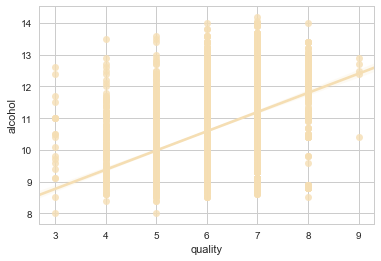

In [36]:
sns.regplot(x=dfwhite["quality"], y=dfwhite["alcohol"], color = 'wheat')

In [37]:
smf.ols('quality ~ alcohol ', data=dfwhite).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     1146.
Date:                Thu, 20 Dec 2018   Prob (F-statistic):          5.61e-226
Time:                        20:40:44   Log-Likelihood:                -5839.4
No. Observations:                4898   AIC:                         1.168e+04
Df Residuals:                    4896   BIC:                         1.170e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5820      0.098     26.345      0.000       2.390       2.774
alcohol        0.3135      0.009     33.858      0.000       0.295       0.332
==============================================================================
Omnibus:                       88.780   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.233
Skew:                           0.031   Prob(JB):                     7.29e-40
Kurtosis:                       3.938   Cond. No.                         91.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Given the above scatterplots and r-squared values from our regression analysis, Alcohol and Density appear to have the strongest relationship with White Wine Quality.**

### *Correlation*

Correlation is an interdependence between two variables, and the correlation coefficient is a statistical measure that calculates the strength of this interdependence. The range of values for the correlation coefficient are from -1.0 to 1.0, these values indicating the strongest correlation.

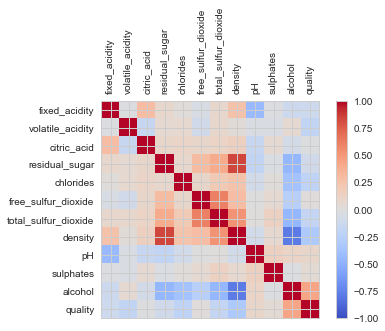

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [38]:
corr_white = dfwhite.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_white,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dfwhite.columns)
ax.set_yticklabels(dfwhite.columns)
plt.show()

corr_white

**Based on the above, Alcohol seems to have the biggest correlation with Quality (0.436) in White Wines, followed by Density (-0.307) and Chlorides (-0.210).**

We also wanted to study how Independent Variables move together. Correlation helps us find this out.  For White Wine we have identified that Density and Residual Sugar have the highest correlation to each other at 0.838966.  

Below are scatterplots showing how these Independent Variables change together, and where different quality wines tend to cluster. 

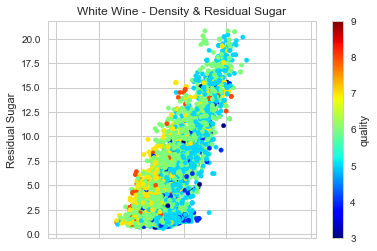

In [82]:
dfwhite_2.plot.scatter('density', 'residual_sugar', c='quality', colormap='jet')
plt.title('White Wine - Density & Residual Sugar')
plt.xlabel('Density')
plt.ylabel('Residual Sugar')
plt.show()

### *Clusters*

The driving idea behind this project was to create a recommendation tool that would allow users to input a white wine that they liked and be served a similar white wine they might also enjoy. The wine information from our data frame is anonymous, which made this difficult, but we wanted to replicate the effect of a recommendation tool based on wine ID numbers.

We will use clustering to achieve this. Clustering is the grouping of a particular set of objects based on their characteristics, aggregating them according to their similarities. The method we will use to cluster is kmeans.

Before we cluster, we want to create a new data frame with normalized values to establish comparable ranges for each of the variables. Additionally we are removing Quality from this data frame since we want to look independently at each of the Independent Variables.

In [40]:
#Create new data frame to prepare cluster

dfwhite_3=dfwhite.copy()

for i in dfwhite_3.columns:
    dfwhite_3[i]=(dfwhite_3[i]-dfwhite_3[i].mean())/(dfwhite_3[i].std())

In [41]:
dfwhite_3

,,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
wine number,type,,,,,,,,,,,,
1,White,0.172079,-0.081762,0.213258,2.821061,-0.035351,0.569873,0.744489,2.331274,-1.246794,-0.349149,-1.393010,0.137856
2,White,-0.657434,0.215874,0.047996,-0.944669,0.147732,-1.252891,-0.149669,-0.009153,0.739953,0.001342,-0.824192,0.137856
3,White,1.475600,0.017450,0.543783,0.100272,0.193503,-0.312109,-0.973236,0.358628,0.475053,-0.436771,-0.336633,0.137856
4,White,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152,0.137856
5,White,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152,0.137856
6,White,1.475600,0.017450,0.543783,0.100272,0.193503,-0.312109,-0.973236,0.358628,0.475053,-0.436771,-0.336633,0.137856
7,White,-0.775936,0.414297,-1.439364,0.119988,-0.035351,-0.312109,-0.055547,0.291759,-0.054746,-0.173903,-0.742932,0.137856
8,White,0.172079,-0.081762,0.213258,2.821061,-0.035351,0.569873,0.744489,2.331274,-1.246794,-0.349149,-1.393010,0.137856
9,White,-0.657434,0.215874,0.047996,-0.944669,0.147732,-1.252891,-0.149669,-0.009153,0.739953,0.001342,-0.824192,0.137856


In [42]:
#Create cluster

kmeans=KMeans(n_clusters=100) #Shows 100 clusters for analysis
y_kmeans=kmeans.fit_predict(dfwhite_3.iloc[:,:-1]) #Removing Quality from cluster analysis

dfwhite_3['cluster']=y_kmeans.tolist() #Adding cluster array to data frame

In [43]:
dfwhite_3=dfwhite_3.reset_index(level='wine number') #Moving wine number index to a column acting in place of Wine Name

In [44]:
dfwhite_3

,wine number,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,cluster
type,,,,,,,,,,,,,,
White,1,0.172079,-0.081762,0.213258,2.821061,-0.035351,0.569873,0.744489,2.331274,-1.246794,-0.349149,-1.393010,0.137856,80
White,2,-0.657434,0.215874,0.047996,-0.944669,0.147732,-1.252891,-0.149669,-0.009153,0.739953,0.001342,-0.824192,0.137856,29
White,3,1.475600,0.017450,0.543783,0.100272,0.193503,-0.312109,-0.973236,0.358628,0.475053,-0.436771,-0.336633,0.137856,4
White,4,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152,0.137856,35
White,5,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152,0.137856,35
White,6,1.475600,0.017450,0.543783,0.100272,0.193503,-0.312109,-0.973236,0.358628,0.475053,-0.436771,-0.336633,0.137856,4
White,7,-0.775936,0.414297,-1.439364,0.119988,-0.035351,-0.312109,-0.055547,0.291759,-0.054746,-0.173903,-0.742932,0.137856,77
White,8,0.172079,-0.081762,0.213258,2.821061,-0.035351,0.569873,0.744489,2.331274,-1.246794,-0.349149,-1.393010,0.137856,80
White,9,-0.657434,0.215874,0.047996,-0.944669,0.147732,-1.252891,-0.149669,-0.009153,0.739953,0.001342,-0.824192,0.137856,29


From the above new data frame with clusters, we can see that each Wine Number is assigned a Cluster. Someone fond of Wine Number 1 would identify the corresponding Cluster, and could then look into other wines in that Cluster to try. While a recommendation is not automatically generated, it does allow one to cut down on the very large list of white wines and hone in on another they might also like.

Below we show an example of calling on all wines in Cluster 0. The use of this tool could be extended to develop a function which, when inputing a given Wine Number, would output other similar wines in that same Cluster.

In [45]:
dfwhite_3.loc[dfwhite_3['cluster']==0,'wine number'].values #We have chosen cluster 0 here

array([  47,   48,  180,  181,  210,  283,  314,  315,  328,  355,  358,
        437,  459,  472,  503,  504,  570,  628,  629,  639,  640,  649,
        692,  693,  694,  707,  765,  941, 1064, 1195, 1768, 2065, 2073,
       2074, 2075, 2392, 2444, 2446, 2447, 2517, 2657, 3399, 3408, 3607,
       3615, 3835, 3839, 4068])

# 3. Red Wine Findings

Let's look at the Red Wine data set.

In [46]:
dfred

,,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
wine number,type,,,,,,,,,,,,
1,Red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
2,Red,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
3,Red,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4,Red,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,Red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
6,Red,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
7,Red,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
8,Red,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
9,Red,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7


In [47]:
dfred.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### *Data Cleanup*

In this section, we removed outliers. Later in this section we will be graphic select variables from this data frame. To better show the relationships between varaibles, we have removed all outliers that are outside of -+ 3 standard deviations from the mean.

We will be removing outliers for Alcohol, Volatile Acidity, Fixed Acidity and pH for the purpose of our graphs.

In [48]:
dfred_2 = dfred[np.abs(dfred.alcohol-dfred.alcohol.mean()) <= (3*dfred.alcohol.std())]
# keep only the ones that are within +3 to -3 standard deviations in the column 'Alcohol'.

dfred_2 = dfred[np.abs(dfred.volatile_acidity-dfred.volatile_acidity.mean()) <= (3*dfred.volatile_acidity.std())]
# keep only the ones that are within +3 to -3 standard deviations in the column 'Volatile Acidity'.

dfred_2 = dfred_2[np.abs(dfred.fixed_acidity-dfred.fixed_acidity.mean()) <= (3*dfred.fixed_acidity.std())]
# keep only the ones that are within +3 to -3 standard deviations in the column 'Fixed Acidity'.

dfred_2 = dfred_2[np.abs(dfred.pH-dfred.pH.mean()) <= (3*dfred.pH.std())]
# keep only the ones that are within +3 to -3 standard deviations in the column 'pH'.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


### *Groupby*

We grouped observations by quality score and by independent variable, and then found the average for each variable.

In [49]:
dfred.groupby('quality')['fixed_acidity','volatile_acidity', 'citric_acid', 
            'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 
            'density', 'pH', 'sulphates', 'alcohol'].mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


Quality scores range from 3 to 8.

For Red Wine, it appears that lower volatile acidity also relates to high quality scores, as do higher levels of citric acid and sulphates, and lower levels of chlorides and pH.

The below bar chart shows the quality score breakdown in Red Wines. It's a pretty close call between the scores of 5 and 6 but slightly more were given a 5, trailed by the score of 7. There were very few 3, 4 and 8 scores.

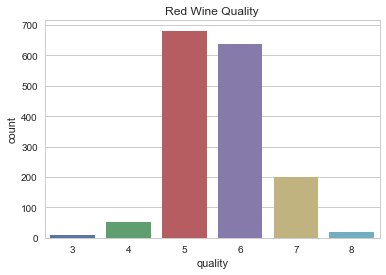

In [50]:
sns.set(style='whitegrid')

sns.countplot(x = 'quality',
              data = dfred).set_title('Red Wine Quality')
plt.show()

### *Distribution of Quality in Red Wines*

In [51]:
dfred['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### *Scatterplots & Regression*

Scatterplots display values for chosen data points, showing how much one variable is affected by another.

Regression analysis estimates the relationship between variables. Regression coefficients represent the mean change in the Dependent Variable for one unit of change in the Independent Variable, holding other variables in the model constant.

#### Quality vs Fixed Acidity 

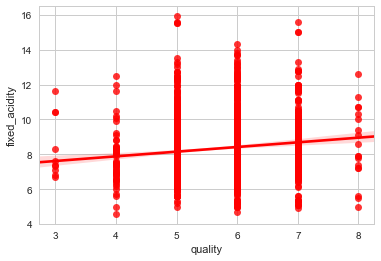

In [52]:
sns.regplot(x=dfred["quality"], y=dfred["fixed_acidity"], color='red')

In [53]:
smf.ols('quality ~ fixed_acidity ', data=dfred).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     24.96
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           6.50e-07
Time:                        20:40:51   Log-Likelihood:                -1914.2
No. Observations:                1599   AIC:                             3832.
Df Residuals:                    1597   BIC:                             3843.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.1573      0.098     52.684      0.000       4.965       5.349
fixed_acidity     0.0575      0.012      4.996      0.000       0.035       0.080
==============================================================================
Omnibus:                       17.047   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.553
Skew:                           0.205   Prob(JB):                     9.36e-05
Kurtosis:                       3.333   Cond. No.                         42.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Quality vs Volatile Acidity 

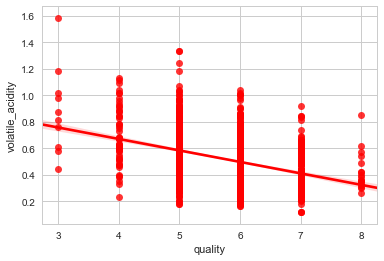

In [54]:
sns.regplot(x=dfred["quality"], y=dfred["volatile_acidity"], color='red')

In [55]:
smf.ols('quality ~ volatile_acidity ', data=dfred).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     287.4
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           2.05e-59
Time:                        20:40:52   Log-Likelihood:                -1794.3
No. Observations:                1599   AIC:                             3593.
Df Residuals:                    1597   BIC:                             3603.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.5657      0.058    113.388      0.000       6.452       6.679
volatile_acidity    -1.7614      0.104    -16.954      0.000      -1.965      -1.558
==============================================================================
Omnibus:                       20.577   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.905
Skew:                           0.242   Prob(JB):                     1.75e-05
Kurtosis:                       3.306   Cond. No.                         7.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Quality vs Citric Acid

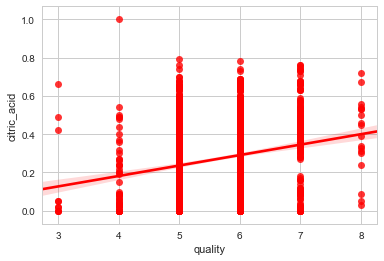

In [56]:
sns.regplot(x=dfred["quality"], y=dfred["citric_acid"], color='red')

In [57]:
smf.ols('quality ~ citric_acid ', data=dfred).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     86.26
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           4.99e-20
Time:                        20:40:53   Log-Likelihood:                -1884.6
No. Observations:                1599   AIC:                             3773.
Df Residuals:                    1597   BIC:                             3784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.3817      0.034    159.610      0.000       5.316       5.448
citric_acid     0.9385      0.101      9.288      0.000       0.740       1.137
==============================================================================
Omnibus:                       11.279   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.967
Skew:                           0.162   Prob(JB):                      0.00252
Kurtosis:                       3.272   Cond. No.                         5.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Quality vs Residual Sugar

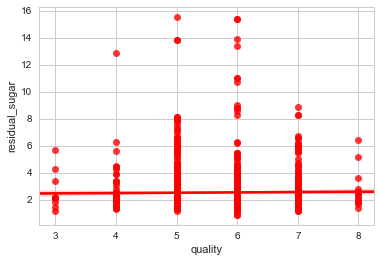

In [58]:
sns.regplot(x=dfred["quality"], y=dfred["residual_sugar"], color='red')

In [59]:
smf.ols('quality ~ residual_sugar ', data=dfred).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3012
Date:                Thu, 20 Dec 2018   Prob (F-statistic):              0.583
Time:                        20:40:53   Log-Likelihood:                -1926.5
No. Observations:                1599   AIC:                             3857.
Df Residuals:                    1597   BIC:                             3868.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.6161      0.042    134.950      0.000       5.534       5.698
residual_sugar     0.0079      0.014      0.549      0.583      -0.020       0.036
==============================================================================
Omnibus:                       16.985   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.016
Skew:                           0.215   Prob(JB):                     0.000122
Kurtosis:                       3.292   Cond. No.                         6.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Quality vs Chlorides

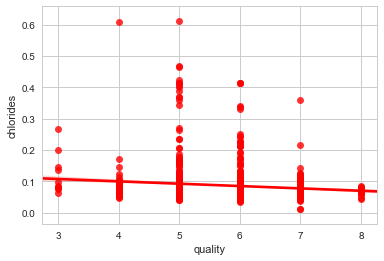

In [60]:
sns.regplot(x=dfred["quality"], y=dfred["chlorides"], color='red')

In [61]:
smf.ols('quality ~ chlorides ', data=dfred).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     26.99
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           2.31e-07
Time:                        20:40:54   Log-Likelihood:                -1913.2
No. Observations:                1599   AIC:                             3830.
Df Residuals:                    1597   BIC:                             3841.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8295      0.042    137.852      0.000       5.747       5.912
chlorides     -2.2118      0.426     -5.195      0.000      -3.047      -1.377
==============================================================================
Omnibus:                       14.102   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.663
Skew:                           0.199   Prob(JB):                     0.000655
Kurtosis:                       3.249   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Quality vs Free Sulfur Dioxide

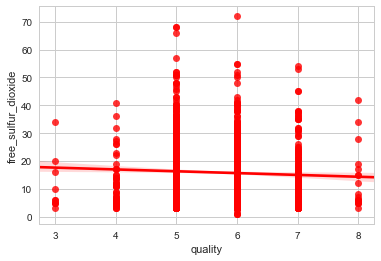

In [62]:
sns.regplot(x=dfred["quality"], y=dfred["free_sulfur_dioxide"], color='red')

In [63]:
smf.ols('quality ~ free_sulfur_dioxide ', data=dfred).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.109
Date:                Thu, 20 Dec 2018   Prob (F-statistic):             0.0428
Time:                        20:40:55   Log-Likelihood:                -1924.6
No. Observations:                1599   AIC:                             3853.
Df Residuals:                    1597   BIC:                             3864.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6981      0.037    155.357      0.000       5.626       5.770
free_sulfur_dioxide    -0.0039      0.002     -2.027      0.043      -0.008      -0.000
==============================================================================
Omnibus:                       16.011   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.376
Skew:                           0.197   Prob(JB):                     0.000169
Kurtosis:                       3.324   Cond. No.                         34.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Quality vs Total Sulfur Dioxide


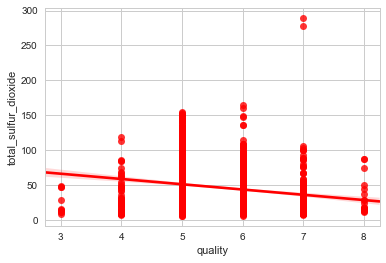

In [64]:
sns.regplot(x=dfred["quality"], y=dfred["total_sulfur_dioxide"], color='red')

In [65]:
smf.ols('quality ~ total_sulfur_dioxide ', data=dfred).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     56.66
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           8.62e-14
Time:                        20:40:55   Log-Likelihood:                -1898.8
No. Observations:                1599   AIC:                             3802.
Df Residuals:                    1597   BIC:                             3812.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.8472      0.034    170.140      0.000       5.780       5.915
total_sulfur_dioxide    -0.0045      0.001     -7.527      0.000      -0.006      -0.003
==============================================================================
Omnibus:                       20.665   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.817
Skew:                           0.117   Prob(JB):                     2.03e-07
Kurtosis:                       3.638   Cond. No.                         98.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Quality vs Density

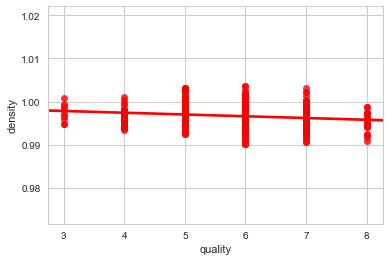

In [66]:
sns.regplot(x=dfred["quality"], y=dfred["density"], color='red')

In [67]:
smf.ols('quality ~ density ', data=dfred).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     50.41
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           1.87e-12
Time:                        20:40:56   Log-Likelihood:                -1901.8
No. Observations:                1599   AIC:                             3808.
Df Residuals:                    1597   BIC:                             3818.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.2385     10.508      7.636      0.000      59.628     100.849
density      -74.8460     10.542     -7.100      0.000     -95.524     -54.168
==============================================================================
Omnibus:                       13.878   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.259
Skew:                           0.174   Prob(JB):                     0.000486
Kurtosis:                       3.329   Cond. No.                     1.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Quality vs pH

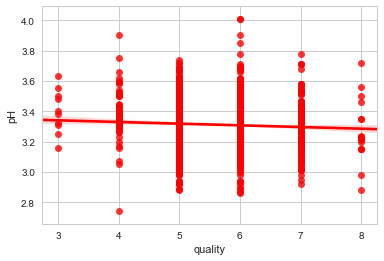

In [68]:
sns.regplot(x=dfred["quality"], y=dfred["pH"], color='red')

In [69]:
smf.ols('quality ~ pH ', data=dfred).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.340
Date:                Thu, 20 Dec 2018   Prob (F-statistic):             0.0210
Time:                        20:40:56   Log-Likelihood:                -1924.0
No. Observations:                1599   AIC:                             3852.
Df Residuals:                    1597   BIC:                             3863.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6359      0.433     15.320      0.000       5.786       7.486
pH            -0.3020      0.131     -2.311      0.021      -0.558      -0.046
==============================================================================
Omnibus:                       16.478   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.084
Skew:                           0.222   Prob(JB):                     0.000195
Kurtosis:                       3.244   Cond. No.                         77.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Quality vs Sulphates

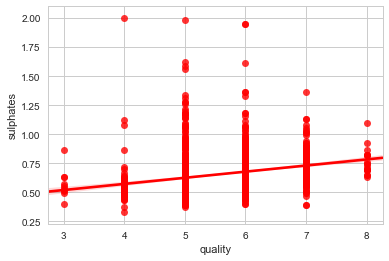

In [70]:
sns.regplot(x=dfred["quality"], y=dfred["sulphates"], color='red')

In [71]:
smf.ols('quality ~ sulphates ', data=dfred).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     107.7
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           1.80e-24
Time:                        20:40:57   Log-Likelihood:                -1874.4
No. Observations:                1599   AIC:                             3753.
Df Residuals:                    1597   BIC:                             3764.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8477      0.078     61.818      0.000       4.694       5.002
sulphates      1.1977      0.115     10.380      0.000       0.971       1.424
==============================================================================
Omnibus:                       12.685   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.098
Skew:                           0.083   Prob(JB):                     0.000194
Kurtosis:                       3.479   Cond. No.                         8.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Quality vs Alcohol

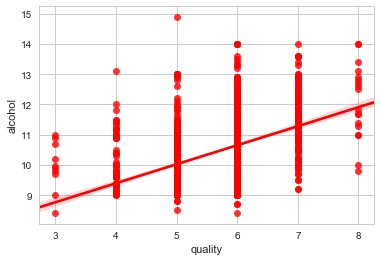

In [72]:
sns.regplot(x=dfred["quality"], y=dfred["alcohol"], color='red')

In [73]:
smf.ols('quality ~ alcohol ', data=dfred).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           2.83e-91
Time:                        20:40:58   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8750      0.175     10.732      0.000       1.532       2.218
alcohol        0.3608      0.017     21.639      0.000       0.328       0.394
==============================================================================
Omnibus:                       38.501   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.758
Skew:                          -0.154   Prob(JB):                     2.62e-16
Kurtosis:                       3.991   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Based on the above plots, Alcohol and Sulphates appear to have the strongest relationship with Red Wine Quality.**

### *Correlation*

Correlation is an interdependence between two variables, and the correlation coefficient is a statistical measure that calculates the strength of this interdependence. The range of values for the correlation coefficient are from -1.0 to 1.0, these values indicating the strongest correlation.

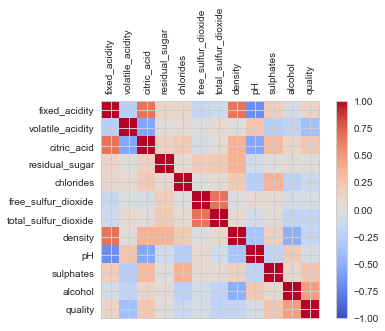

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [74]:
corr_red = dfred.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_red,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dfred.columns)
ax.set_yticklabels(dfred.columns)
plt.show()

corr_red

**Based on the above, Alcohol seems to have the biggest correlation with Quality in Red Wine as well (0.476) followed by Volatile Acidity (-0.39).**

We also wanted to study how Independent Variables move together. Correlation helps us find this out.  For Red Wine we have identified that pH and Fixed Acidity have the highest correlation to each other at -0.682978.  

Below are scatterplots showing how these Independent Variables change together, and where different quality wines tend to cluster. 

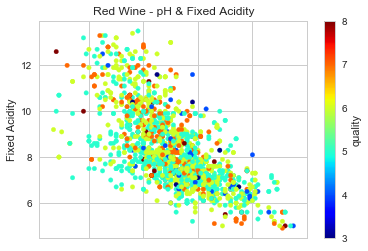

In [75]:
dfred_2.plot.scatter('pH', 'fixed_acidity', c='quality', colormap='jet')
plt.title('Red Wine - pH & Fixed Acidity')
plt.xlabel('pH')
plt.ylabel('Fixed Acidity')
plt.show()

### *Clusters*

The driving idea behind this project was to create a recommendation tool that would allow users to input a red wine that they liked and be served a similar red wine they might also enjoy. The wine information from our data frame is anonymous, which made this difficult, but we wanted to replicate the effect of a recommendation tool based on wine ID numbers.

We will use clustering to achieve this. Clustering is the grouping of a particular set of objects based on their characteristics, aggregating them according to their similarities. The method we will use to cluster is kmeans.

Before we cluster, we want to create a new data frame with normalized values to establish comparable ranges for each of the variables. Additionally we are removing Quality from this data frame since we want to look independently at each of the Independent Variables.

In [76]:
#Create new data frame to prepare cluster

dfred_3=dfred.copy()

for i in dfred_3.columns:
    dfred_3[i]=(dfred_3[i]-dfred_3[i].mean())/(dfred_3[i].std())

In [77]:
dfred_3

,,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
wine number,type,,,,,,,,,,,,
1,Red,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576
2,Red,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594,-0.787576
3,Red,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594,-0.787576
4,Red,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594,0.450707
5,Red,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576
6,Red,-0.528194,0.738187,-1.391037,-0.524002,-0.264878,-0.274845,-0.196617,0.558100,1.288240,-0.579025,-0.959946,-0.787576
7,Red,-0.241019,0.403103,-1.083031,-0.665853,-0.392360,-0.083643,0.380972,-0.183687,-0.071983,-1.168972,-0.959946,-0.787576
8,Red,-0.585629,0.682339,-1.391037,-0.949556,-0.477348,-0.083643,-0.774207,-1.137414,0.510970,-1.109977,-0.396918,1.688991
9,Red,-0.298454,0.291408,-1.288368,-0.382151,-0.307372,-0.657248,-0.865405,0.028252,0.316652,-0.520031,-0.866108,1.688991


In [78]:
#Create cluster

kmeans=KMeans(n_clusters=100) #Shows 100 clusters for analysis
y_kmeans=kmeans.fit_predict(dfred_3.iloc[:,:-1]) #Removing Quality from cluster analysis

dfred_3['cluster']=y_kmeans.tolist() #Adding cluster array to data frame

In [79]:
dfred_3=dfred_3.reset_index(level='wine number') #Moving wine number index to a column acting in place of Wine Name

In [80]:
dfred_3

,wine number,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,cluster
type,,,,,,,,,,,,,,
Red,1,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576,45
Red,2,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594,-0.787576,42
Red,3,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594,-0.787576,42
Red,4,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594,0.450707,87
Red,5,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576,45
Red,6,-0.528194,0.738187,-1.391037,-0.524002,-0.264878,-0.274845,-0.196617,0.558100,1.288240,-0.579025,-0.959946,-0.787576,45
Red,7,-0.241019,0.403103,-1.083031,-0.665853,-0.392360,-0.083643,0.380972,-0.183687,-0.071983,-1.168972,-0.959946,-0.787576,42
Red,8,-0.585629,0.682339,-1.391037,-0.949556,-0.477348,-0.083643,-0.774207,-1.137414,0.510970,-1.109977,-0.396918,1.688991,11
Red,9,-0.298454,0.291408,-1.288368,-0.382151,-0.307372,-0.657248,-0.865405,0.028252,0.316652,-0.520031,-0.866108,1.688991,44


From the above new data frame with clusters, we can see that each Wine Number is assigned a Cluster. Someone fond of Wine Number 1 would identify the corresponding Cluster, and could then look into other wines in that Cluster to try. While a recommendation is not automatically generated, it does allow one to cut down on the very large list of red wines and hone in on another they might also like.

Below we show an example of calling on all wines in Cluster 0. The use of this tool could be extended to develop a function which, when inputing a given Wine Number, would output other similar wines in that same Cluster.

In [81]:
dfred_3.loc[dfred_3['cluster']==1,'wine number'].values #We have chosen cluster 1 here

array([  13,  108,  147,  160,  184,  185, 1196])

# 4. Key Takeaways

Top Quality Predictors, per the regression:
- White: Density, Alcohol
- Red: Alcohol, Sulphates

Top Quality Predictors, per the correlation:
- White: Alcohol, Density
- Red: Alcohol, Volatile Acidity

Independent Variables that have highest correlation to each other:
- White Wine: Density, Residual Sugar
- Red Wine: pH, Fixed Acidity

Ultimately, while we have identified largest predictors, we do not have enough evidence to support that these chemical attributes are determinants of quality. 

Our group was expecting stronger patterns between Independent Variables and Quality. The key to unlocking more significant patterns may lie in the relationships between the Independent Variables themselves.

The clustering tool enabled us to look at all variables at the same time, which was far less limiting than studying variables on a 2D scale. This provides us with a better recommendation tool than simply pulling wines that share a single chemical attribute.

# Conclusion

This was our first exploration of the relationship between a wine's chemical attributes and its quality, but can agree this exercise has real-world impact. It can be used as a guide for recommending and purchasing wine. It could also be used in wine valuation for younger, lesser known wines that don't yet have the benefit of age or reputation.

We also wondered whether there is a relationship or correlation between Quality and Retail Value. Unfortunately, since we could not find any data sets that mapped this variable, we were not able to test it our ourselves.